In [1]:
import tensorflow as tf
from Script.DataGenerator import DataGenerator
from Script.Metrics_Evaluation import Evaluation
from CNNGM import CNNGM, generate_input
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if len(gpus):
    print("Running on GPU")
    tf.config.set_visible_devices(gpus[0], 'GPU')
else :
    print("Running on CPU")


Running on GPU


In [3]:
BATCH_SIZE = 2048
EPOCH = 50
ABC_GM = os.path.join("..", "ABC_gm")
DATA_PATH = os.path.join(ABC_GM, "Train_gm")
VALIDATION_PATH = os.path.join(ABC_GM, "Validation_gm")
TEST_PATH = os.path.join(ABC_GM, "Test_gm")
MODEL_PATH = os.path.join("Model", "CNNGM")

In [4]:
def generate_input(x):
    shape = x.shape
    a = int(np.sqrt(shape[1]))
    return x.reshape((shape[0], a, a, shape[2]))

In [5]:
datagen_train = DataGenerator(DATA_PATH, generate_input, batch_size=BATCH_SIZE, split=0.5, extension="_.ply.npy", shuffle=False)
datagen_validation = DataGenerator(VALIDATION_PATH, generate_input, batch_size=BATCH_SIZE, split=1, extension="_.ply.npy", shuffle=False)

In [6]:
a = int(np.sqrt(datagen_train.get_input_shape()[1]))

## Model CNNGM

In [7]:
model = CNNGM((a, a, 3)).build()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30, 30, 3)]  0           []                               
                                                                                                  
 batch_shuffling_layer (BatchSh  (None, 30, 30, 3)   0           ['input_1[0][0]']                
 ufflingLayer)                                                                                    
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 64)   4864        ['batch_shuffling_layer[0][0]']  
                                                                                                  
 conv2d_1 (Conv2D)              (None, 21, 21, 128)  38528       ['batch_shuffling_layer[0][0]

## Training 

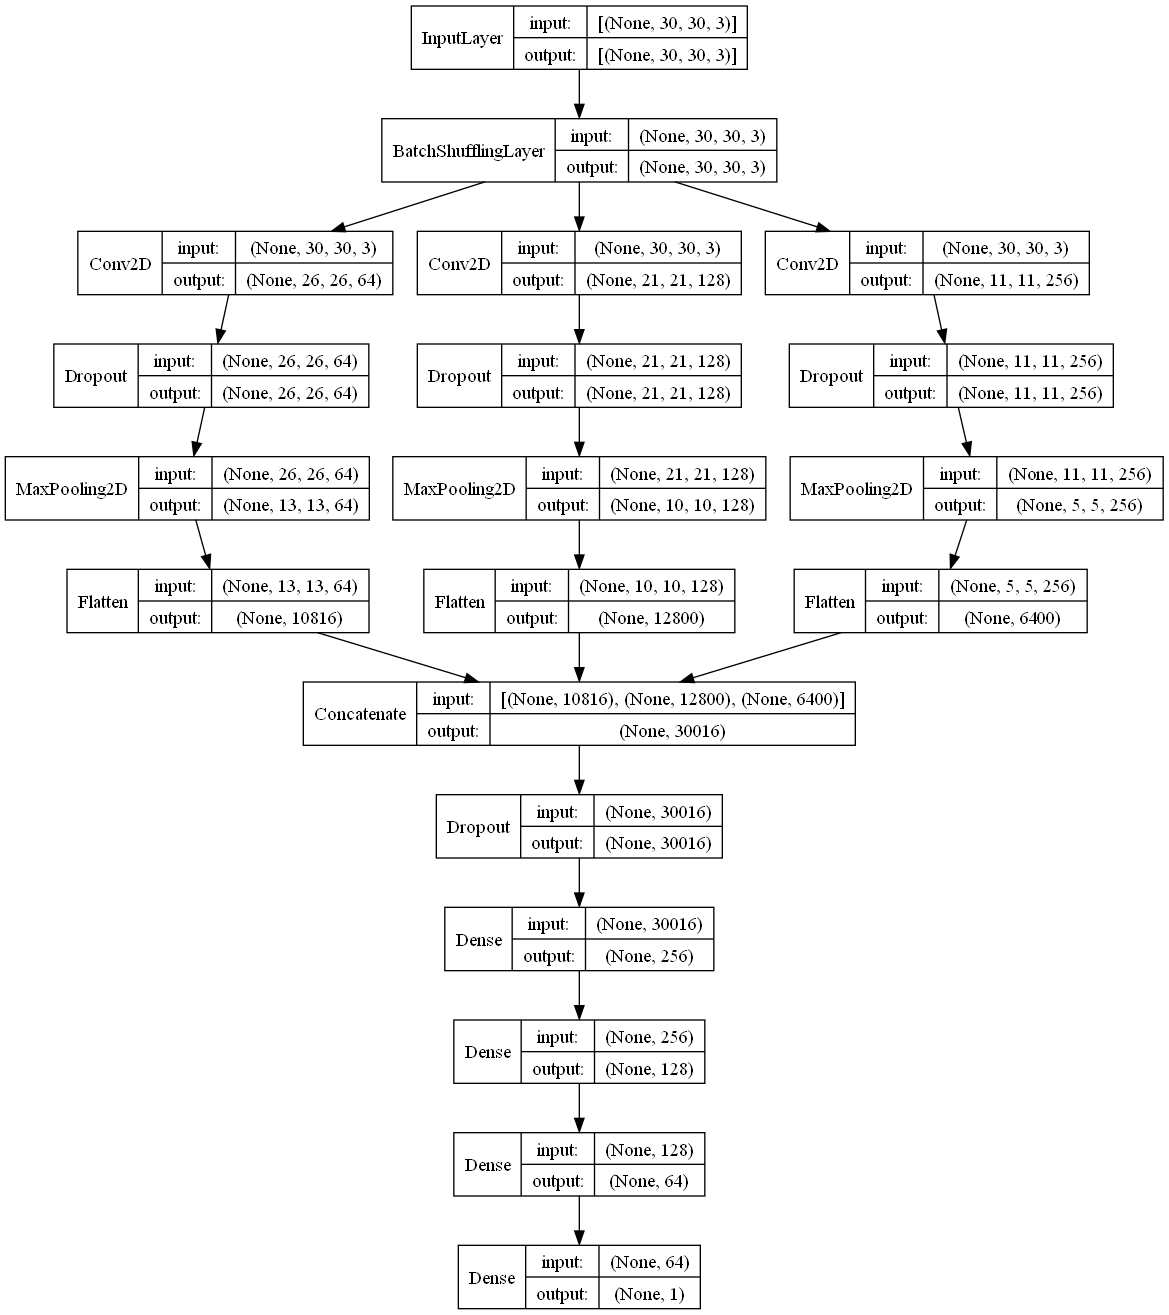

In [8]:
tf.keras.utils.plot_model(model, to_file=os.path.join("result", "model_CNNGM.png"), show_layer_names=False,  show_shapes=True)

In [9]:
metrics = ["accuracy", tf.keras.metrics.Precision(thresholds=0.5), tf.keras.metrics.Recall(thresholds=0.5)]

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=metrics)

In [11]:
%%time
hist = model.fit(datagen_train, validation_data=datagen_validation, epochs=10,
         callbacks= [tf.keras.callbacks.ReduceLROnPlateau(factor=tf.math.exp(-4.1), patience=int(EPOCH*5/10), min_lr=0.0000001)])

Epoch 1/10
502/502 [==============================] - 87s 162ms/step - loss: 0.9257 - accuracy: 0.5191 - precision: 0.4996 - recall: 0.4974 - val_loss: 0.7234 - val_accuracy: 0.4958 - val_precision: 0.5055 - val_recall: 0.4198 - lr: 0.0010
Epoch 2/10
502/502 [==============================] - 73s 146ms/step - loss: 0.7300 - accuracy: 0.5189 - precision: 0.4994 - recall: 0.4920 - val_loss: 0.7440 - val_accuracy: 0.4583 - val_precision: 0.4756 - val_recall: 0.8152 - lr: 0.0010
Epoch 3/10
502/502 [==============================] - 74s 147ms/step - loss: 0.6982 - accuracy: 0.5188 - precision: 0.4993 - recall: 0.4937 - val_loss: 0.6808 - val_accuracy: 0.5358 - val_precision: 0.5332 - val_recall: 0.5743 - lr: 0.0010
Epoch 4/10
502/502 [==============================] - 74s 147ms/step - loss: 0.7000 - accuracy: 0.5185 - precision: 0.4990 - recall: 0.4924 - val_loss: 0.6994 - val_accuracy: 0.5366 - val_precision: 0.5221 - val_recall: 0.8637 - lr: 0.0010
Epoch 5/10
502/502 [====================

<Figure size 1000x500 with 0 Axes>

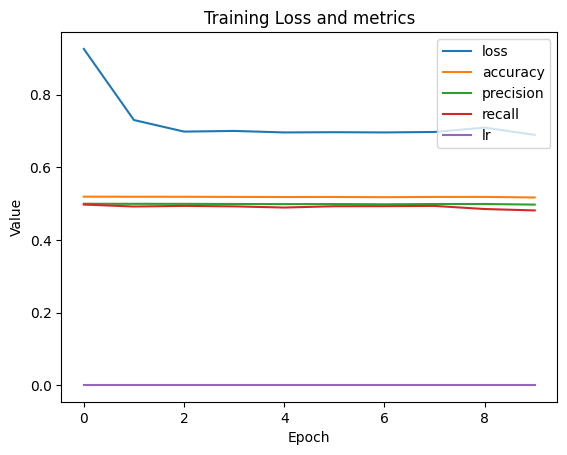

In [12]:
history_df = pd.DataFrame(hist.history)
plt.figure(figsize=(10, 5))
history_df[['loss', 'accuracy', 'precision', 'recall', 'lr']].plot()
plt.title('Training Loss and metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.savefig(os.path.join("result", "model_CNNGM_plot.png"))
plt.show()

# Evaluate

In [13]:
datagen_test = DataGenerator(TEST_PATH, generate_input, batch_size=BATCH_SIZE, split=1, extension="_.ply.npy")

In [14]:
%%time
e1 = Evaluation(model, datagen_test)
e1.predict()

Running on GPU


  0%|                                                                                          | 0/223 [00:00<?, ?it/s]

64/64 [==============================] - 0s 4ms/step


  0%|▎                                                                                 | 1/223 [00:00<02:14,  1.65it/s]

64/64 [==============================] - 0s 2ms/step


  1%|▋                                                                                 | 2/223 [00:00<01:24,  2.60it/s]

64/64 [==============================] - 0s 2ms/step


  1%|█                                                                                 | 3/223 [00:01<01:09,  3.18it/s]

64/64 [==============================] - 0s 2ms/step


  2%|█▍                                                                                | 4/223 [00:01<01:01,  3.57it/s]

64/64 [==============================] - 0s 2ms/step


  2%|█▊                                                                                | 5/223 [00:01<01:15,  2.90it/s]

64/64 [==============================] - 0s 2ms/step


  3%|██▏                                                                               | 6/223 [00:01<01:06,  3.25it/s]

64/64 [==============================] - 0s 2ms/step


  3%|██▌                                                                               | 7/223 [00:02<01:01,  3.52it/s]

64/64 [==============================] - 0s 2ms/step


  4%|██▉                                                                               | 8/223 [00:02<00:58,  3.69it/s]

64/64 [==============================] - 0s 2ms/step


  4%|███▎                                                                              | 9/223 [00:02<00:56,  3.82it/s]

64/64 [==============================] - 0s 2ms/step


  4%|███▋                                                                             | 10/223 [00:02<00:54,  3.88it/s]

64/64 [==============================] - 0s 2ms/step


  5%|███▉                                                                             | 11/223 [00:03<00:54,  3.91it/s]

64/64 [==============================] - 0s 2ms/step


  5%|████▎                                                                            | 12/223 [00:03<00:53,  3.93it/s]

64/64 [==============================] - 0s 2ms/step


  6%|████▋                                                                            | 13/223 [00:03<00:52,  3.98it/s]

64/64 [==============================] - 0s 3ms/step


  6%|█████                                                                            | 14/223 [00:03<00:53,  3.91it/s]

64/64 [==============================] - 0s 2ms/step


  7%|█████▍                                                                           | 15/223 [00:04<00:53,  3.92it/s]

64/64 [==============================] - 0s 2ms/step


  7%|█████▊                                                                           | 16/223 [00:04<00:52,  3.94it/s]

64/64 [==============================] - 0s 2ms/step


  8%|██████▏                                                                          | 17/223 [00:04<00:51,  4.00it/s]

64/64 [==============================] - 0s 2ms/step


  8%|██████▌                                                                          | 18/223 [00:04<00:50,  4.04it/s]

64/64 [==============================] - 0s 2ms/step


  9%|██████▉                                                                          | 19/223 [00:05<00:50,  4.04it/s]

64/64 [==============================] - 0s 2ms/step


  9%|███████▎                                                                         | 20/223 [00:05<00:57,  3.56it/s]

64/64 [==============================] - 0s 2ms/step


  9%|███████▋                                                                         | 21/223 [00:05<00:54,  3.71it/s]

64/64 [==============================] - 0s 2ms/step


 10%|███████▉                                                                         | 22/223 [00:06<00:52,  3.82it/s]

64/64 [==============================] - 0s 2ms/step


 10%|████████▎                                                                        | 23/223 [00:06<00:51,  3.90it/s]

64/64 [==============================] - 0s 2ms/step


 11%|████████▋                                                                        | 24/223 [00:06<00:57,  3.48it/s]

64/64 [==============================] - 0s 2ms/step


 11%|█████████                                                                        | 25/223 [00:06<00:54,  3.65it/s]

64/64 [==============================] - 0s 2ms/step


 12%|█████████▍                                                                       | 26/223 [00:07<00:52,  3.78it/s]

64/64 [==============================] - 0s 2ms/step


 12%|█████████▊                                                                       | 27/223 [00:07<00:50,  3.88it/s]

64/64 [==============================] - 0s 2ms/step


 13%|██████████▏                                                                      | 28/223 [00:07<00:49,  3.96it/s]

64/64 [==============================] - 0s 2ms/step


 13%|██████████▌                                                                      | 29/223 [00:07<00:48,  4.01it/s]

64/64 [==============================] - 0s 2ms/step


 13%|██████████▉                                                                      | 30/223 [00:08<00:47,  4.04it/s]

64/64 [==============================] - 0s 2ms/step


 14%|███████████▎                                                                     | 31/223 [00:08<01:06,  2.90it/s]

64/64 [==============================] - 0s 2ms/step


 14%|███████████▌                                                                     | 32/223 [00:08<01:00,  3.15it/s]

64/64 [==============================] - 0s 3ms/step


 15%|███████████▉                                                                     | 33/223 [00:09<00:56,  3.33it/s]

64/64 [==============================] - 0s 2ms/step


 15%|████████████▎                                                                    | 34/223 [00:09<00:54,  3.45it/s]

64/64 [==============================] - 0s 2ms/step


 16%|████████████▋                                                                    | 35/223 [00:09<00:51,  3.62it/s]

64/64 [==============================] - 0s 2ms/step


 16%|█████████████                                                                    | 36/223 [00:09<00:50,  3.73it/s]

64/64 [==============================] - 0s 2ms/step


 17%|█████████████▍                                                                   | 37/223 [00:10<00:48,  3.81it/s]

64/64 [==============================] - 0s 2ms/step


 17%|█████████████▊                                                                   | 38/223 [00:10<00:47,  3.88it/s]

64/64 [==============================] - 0s 2ms/step


 17%|██████████████▏                                                                  | 39/223 [00:10<00:46,  3.94it/s]

64/64 [==============================] - 0s 2ms/step


 18%|██████████████▌                                                                  | 40/223 [00:10<00:46,  3.98it/s]

64/64 [==============================] - 0s 2ms/step


 18%|██████████████▉                                                                  | 41/223 [00:11<00:45,  4.01it/s]

64/64 [==============================] - 0s 2ms/step


 19%|███████████████▎                                                                 | 42/223 [00:11<00:45,  4.02it/s]

64/64 [==============================] - 0s 2ms/step


 19%|███████████████▌                                                                 | 43/223 [00:11<00:44,  4.04it/s]

64/64 [==============================] - 0s 2ms/step


 20%|███████████████▉                                                                 | 44/223 [00:11<00:44,  4.00it/s]

64/64 [==============================] - 0s 2ms/step


 20%|████████████████▎                                                                | 45/223 [00:12<00:44,  4.03it/s]

64/64 [==============================] - 0s 2ms/step


 21%|████████████████▋                                                                | 46/223 [00:12<00:44,  4.01it/s]

64/64 [==============================] - 0s 2ms/step


 21%|█████████████████                                                                | 47/223 [00:12<00:43,  4.02it/s]

64/64 [==============================] - 0s 2ms/step


 22%|█████████████████▍                                                               | 48/223 [00:12<00:43,  4.06it/s]

64/64 [==============================] - 0s 2ms/step


 22%|█████████████████▊                                                               | 49/223 [00:13<00:42,  4.08it/s]

64/64 [==============================] - 0s 2ms/step


 22%|██████████████████▏                                                              | 50/223 [00:13<00:42,  4.11it/s]

64/64 [==============================] - 0s 2ms/step


 23%|██████████████████▌                                                              | 51/223 [00:13<00:55,  3.11it/s]

64/64 [==============================] - 0s 2ms/step


 23%|██████████████████▉                                                              | 52/223 [00:14<00:51,  3.34it/s]

64/64 [==============================] - 0s 2ms/step


 24%|███████████████████▎                                                             | 53/223 [00:14<00:48,  3.47it/s]

64/64 [==============================] - 0s 2ms/step


 24%|███████████████████▌                                                             | 54/223 [00:14<00:47,  3.53it/s]

64/64 [==============================] - 0s 2ms/step


 25%|███████████████████▉                                                             | 55/223 [00:14<00:45,  3.69it/s]

64/64 [==============================] - 0s 2ms/step


 25%|████████████████████▎                                                            | 56/223 [00:15<00:43,  3.80it/s]

64/64 [==============================] - 0s 2ms/step


 26%|████████████████████▋                                                            | 57/223 [00:15<00:42,  3.89it/s]

64/64 [==============================] - 0s 2ms/step


 26%|█████████████████████                                                            | 58/223 [00:15<00:41,  3.94it/s]

64/64 [==============================] - 0s 2ms/step


 26%|█████████████████████▍                                                           | 59/223 [00:15<00:41,  3.98it/s]

64/64 [==============================] - 0s 2ms/step


 27%|█████████████████████▊                                                           | 60/223 [00:16<00:40,  4.01it/s]

64/64 [==============================] - 0s 2ms/step


 27%|██████████████████████▏                                                          | 61/223 [00:16<00:41,  3.91it/s]

64/64 [==============================] - 0s 2ms/step


 28%|██████████████████████▌                                                          | 62/223 [00:16<00:40,  3.95it/s]

64/64 [==============================] - 0s 2ms/step


 28%|██████████████████████▉                                                          | 63/223 [00:16<00:40,  3.98it/s]

64/64 [==============================] - 0s 2ms/step


 29%|███████████████████████▏                                                         | 64/223 [00:17<00:55,  2.85it/s]

64/64 [==============================] - 0s 2ms/step


 29%|███████████████████████▌                                                         | 65/223 [00:17<00:50,  3.12it/s]

64/64 [==============================] - 0s 2ms/step


 30%|███████████████████████▉                                                         | 66/223 [00:17<00:47,  3.33it/s]

64/64 [==============================] - 0s 2ms/step


 30%|████████████████████████▎                                                        | 67/223 [00:18<00:43,  3.59it/s]

64/64 [==============================] - 0s 2ms/step


 30%|████████████████████████▋                                                        | 68/223 [00:18<00:40,  3.79it/s]

64/64 [==============================] - 0s 2ms/step


 31%|█████████████████████████                                                        | 69/223 [00:18<00:38,  3.96it/s]

64/64 [==============================] - 0s 2ms/step


 31%|█████████████████████████▍                                                       | 70/223 [00:18<00:37,  4.07it/s]

64/64 [==============================] - 0s 2ms/step


 32%|█████████████████████████▊                                                       | 71/223 [00:19<00:36,  4.16it/s]

64/64 [==============================] - 0s 2ms/step


 32%|██████████████████████████▏                                                      | 72/223 [00:19<00:35,  4.22it/s]

64/64 [==============================] - 0s 2ms/step


 33%|██████████████████████████▌                                                      | 73/223 [00:19<00:35,  4.26it/s]

64/64 [==============================] - 0s 2ms/step


 33%|██████████████████████████▉                                                      | 74/223 [00:19<00:35,  4.21it/s]

64/64 [==============================] - 0s 2ms/step


 34%|███████████████████████████▏                                                     | 75/223 [00:20<00:35,  4.17it/s]

64/64 [==============================] - 0s 2ms/step


 34%|███████████████████████████▌                                                     | 76/223 [00:20<00:35,  4.14it/s]

64/64 [==============================] - 0s 2ms/step


 35%|███████████████████████████▉                                                     | 77/223 [00:20<00:35,  4.11it/s]

64/64 [==============================] - 0s 2ms/step


 35%|████████████████████████████▎                                                    | 78/223 [00:20<00:35,  4.10it/s]

64/64 [==============================] - 0s 2ms/step


 35%|████████████████████████████▋                                                    | 79/223 [00:21<00:35,  4.10it/s]

64/64 [==============================] - 0s 2ms/step


 36%|█████████████████████████████                                                    | 80/223 [00:21<00:34,  4.11it/s]

64/64 [==============================] - 0s 2ms/step


 36%|█████████████████████████████▍                                                   | 81/223 [00:21<00:34,  4.12it/s]

64/64 [==============================] - 0s 2ms/step


 37%|█████████████████████████████▊                                                   | 82/223 [00:21<00:34,  4.14it/s]

64/64 [==============================] - 0s 2ms/step


 37%|██████████████████████████████▏                                                  | 83/223 [00:22<00:33,  4.13it/s]

64/64 [==============================] - 0s 2ms/step


 38%|██████████████████████████████▌                                                  | 84/223 [00:22<00:34,  4.06it/s]

64/64 [==============================] - 0s 2ms/step


 38%|██████████████████████████████▊                                                  | 85/223 [00:22<00:33,  4.10it/s]

64/64 [==============================] - 0s 2ms/step


 39%|███████████████████████████████▏                                                 | 86/223 [00:22<00:41,  3.27it/s]

64/64 [==============================] - 0s 2ms/step


 39%|███████████████████████████████▌                                                 | 87/223 [00:23<00:38,  3.49it/s]

64/64 [==============================] - 0s 2ms/step


 39%|███████████████████████████████▉                                                 | 88/223 [00:23<00:37,  3.63it/s]

64/64 [==============================] - 0s 2ms/step


 40%|████████████████████████████████▎                                                | 89/223 [00:23<00:35,  3.75it/s]

64/64 [==============================] - 0s 2ms/step


 40%|████████████████████████████████▋                                                | 90/223 [00:23<00:34,  3.84it/s]

64/64 [==============================] - 0s 2ms/step


 41%|█████████████████████████████████                                                | 91/223 [00:24<00:33,  3.89it/s]

64/64 [==============================] - 0s 2ms/step


 41%|█████████████████████████████████▍                                               | 92/223 [00:24<00:33,  3.95it/s]

64/64 [==============================] - 0s 3ms/step


 42%|█████████████████████████████████▊                                               | 93/223 [00:24<00:33,  3.93it/s]

64/64 [==============================] - 0s 2ms/step


 42%|██████████████████████████████████▏                                              | 94/223 [00:24<00:32,  3.98it/s]

64/64 [==============================] - 0s 2ms/step


 43%|██████████████████████████████████▌                                              | 95/223 [00:25<00:31,  4.01it/s]

64/64 [==============================] - 0s 2ms/step


 43%|██████████████████████████████████▊                                              | 96/223 [00:25<00:31,  4.05it/s]

64/64 [==============================] - 0s 2ms/step


 43%|███████████████████████████████████▏                                             | 97/223 [00:25<00:31,  4.06it/s]

64/64 [==============================] - 0s 2ms/step


 44%|███████████████████████████████████▌                                             | 98/223 [00:26<00:37,  3.37it/s]

64/64 [==============================] - 0s 2ms/step


 44%|███████████████████████████████████▉                                             | 99/223 [00:26<00:34,  3.56it/s]

64/64 [==============================] - 0s 2ms/step


 45%|███████████████████████████████████▊                                            | 100/223 [00:26<00:33,  3.71it/s]

64/64 [==============================] - 0s 2ms/step


 45%|████████████████████████████████████▏                                           | 101/223 [00:26<00:31,  3.82it/s]

64/64 [==============================] - 0s 2ms/step


 46%|████████████████████████████████████▌                                           | 102/223 [00:27<00:31,  3.90it/s]

64/64 [==============================] - 0s 2ms/step


 46%|████████████████████████████████████▉                                           | 103/223 [00:27<00:30,  3.90it/s]

64/64 [==============================] - 0s 2ms/step


 47%|█████████████████████████████████████▎                                          | 104/223 [00:27<00:29,  3.97it/s]

64/64 [==============================] - 0s 2ms/step


 47%|█████████████████████████████████████▋                                          | 105/223 [00:27<00:29,  4.03it/s]

64/64 [==============================] - 0s 2ms/step


 48%|██████████████████████████████████████                                          | 106/223 [00:28<00:28,  4.05it/s]

64/64 [==============================] - 0s 2ms/step


 48%|██████████████████████████████████████▍                                         | 107/223 [00:28<00:28,  4.08it/s]

64/64 [==============================] - 0s 2ms/step


 48%|██████████████████████████████████████▋                                         | 108/223 [00:28<00:28,  4.09it/s]

64/64 [==============================] - 0s 2ms/step


 49%|███████████████████████████████████████                                         | 109/223 [00:28<00:33,  3.40it/s]

64/64 [==============================] - 0s 2ms/step


 49%|███████████████████████████████████████▍                                        | 110/223 [00:29<00:31,  3.56it/s]

64/64 [==============================] - 0s 2ms/step


 50%|███████████████████████████████████████▊                                        | 111/223 [00:29<00:30,  3.69it/s]

64/64 [==============================] - 0s 2ms/step


 50%|████████████████████████████████████████▏                                       | 112/223 [00:29<00:29,  3.80it/s]

64/64 [==============================] - 0s 2ms/step


 51%|████████████████████████████████████████▌                                       | 113/223 [00:29<00:28,  3.81it/s]

64/64 [==============================] - 0s 2ms/step


 51%|████████████████████████████████████████▉                                       | 114/223 [00:30<00:28,  3.89it/s]

64/64 [==============================] - 0s 2ms/step


 52%|█████████████████████████████████████████▎                                      | 115/223 [00:30<00:27,  3.96it/s]

64/64 [==============================] - 0s 2ms/step


 52%|█████████████████████████████████████████▌                                      | 116/223 [00:30<00:26,  4.01it/s]

64/64 [==============================] - 0s 2ms/step


 52%|█████████████████████████████████████████▉                                      | 117/223 [00:30<00:26,  4.04it/s]

64/64 [==============================] - 0s 2ms/step


 53%|██████████████████████████████████████████▎                                     | 118/223 [00:31<00:25,  4.05it/s]

64/64 [==============================] - 0s 2ms/step


 53%|██████████████████████████████████████████▋                                     | 119/223 [00:31<00:25,  4.06it/s]

64/64 [==============================] - 0s 2ms/step


 54%|███████████████████████████████████████████                                     | 120/223 [00:31<00:31,  3.26it/s]

64/64 [==============================] - 0s 2ms/step


 54%|███████████████████████████████████████████▍                                    | 121/223 [00:32<00:29,  3.48it/s]

64/64 [==============================] - 0s 2ms/step


 55%|███████████████████████████████████████████▊                                    | 122/223 [00:32<00:27,  3.65it/s]

64/64 [==============================] - 0s 2ms/step


 55%|████████████████████████████████████████████▏                                   | 123/223 [00:32<00:27,  3.70it/s]

64/64 [==============================] - 0s 2ms/step


 56%|████████████████████████████████████████████▍                                   | 124/223 [00:32<00:25,  3.82it/s]

64/64 [==============================] - 0s 2ms/step


 56%|████████████████████████████████████████████▊                                   | 125/223 [00:33<00:25,  3.91it/s]

64/64 [==============================] - 0s 2ms/step


 57%|█████████████████████████████████████████████▏                                  | 126/223 [00:33<00:24,  3.97it/s]

64/64 [==============================] - 0s 2ms/step


 57%|█████████████████████████████████████████████▌                                  | 127/223 [00:33<00:23,  4.02it/s]

64/64 [==============================] - 0s 2ms/step


 57%|█████████████████████████████████████████████▉                                  | 128/223 [00:33<00:23,  4.07it/s]

64/64 [==============================] - 0s 2ms/step


 58%|██████████████████████████████████████████████▎                                 | 129/223 [00:34<00:22,  4.09it/s]

64/64 [==============================] - 0s 2ms/step


 58%|██████████████████████████████████████████████▋                                 | 130/223 [00:34<00:22,  4.11it/s]

64/64 [==============================] - 0s 2ms/step


 59%|██████████████████████████████████████████████▉                                 | 131/223 [00:34<00:22,  4.10it/s]

64/64 [==============================] - 0s 2ms/step


 59%|███████████████████████████████████████████████▎                                | 132/223 [00:34<00:22,  4.09it/s]

64/64 [==============================] - 0s 2ms/step


 60%|███████████████████████████████████████████████▋                                | 133/223 [00:35<00:22,  4.00it/s]

64/64 [==============================] - 0s 2ms/step


 60%|████████████████████████████████████████████████                                | 134/223 [00:35<00:22,  3.98it/s]

64/64 [==============================] - 0s 2ms/step


 61%|████████████████████████████████████████████████▍                               | 135/223 [00:35<00:21,  4.02it/s]

64/64 [==============================] - 0s 2ms/step


 61%|████████████████████████████████████████████████▊                               | 136/223 [00:36<00:29,  2.92it/s]

64/64 [==============================] - 0s 2ms/step


 61%|█████████████████████████████████████████████████▏                              | 137/223 [00:36<00:27,  3.13it/s]

64/64 [==============================] - 0s 2ms/step


 62%|█████████████████████████████████████████████████▌                              | 138/223 [00:36<00:25,  3.32it/s]

64/64 [==============================] - 0s 2ms/step


 62%|█████████████████████████████████████████████████▊                              | 139/223 [00:36<00:24,  3.50it/s]

64/64 [==============================] - 0s 2ms/step


 63%|██████████████████████████████████████████████████▏                             | 140/223 [00:37<00:22,  3.63it/s]

64/64 [==============================] - 0s 2ms/step


 63%|██████████████████████████████████████████████████▌                             | 141/223 [00:37<00:21,  3.76it/s]

64/64 [==============================] - 0s 2ms/step


 64%|██████████████████████████████████████████████████▉                             | 142/223 [00:37<00:21,  3.80it/s]

64/64 [==============================] - 0s 2ms/step


 64%|███████████████████████████████████████████████████▎                            | 143/223 [00:37<00:20,  3.91it/s]

64/64 [==============================] - 0s 2ms/step


 65%|███████████████████████████████████████████████████▋                            | 144/223 [00:38<00:19,  3.97it/s]

64/64 [==============================] - 0s 2ms/step


 65%|████████████████████████████████████████████████████                            | 145/223 [00:38<00:19,  4.02it/s]

64/64 [==============================] - 0s 2ms/step


 65%|████████████████████████████████████████████████████▍                           | 146/223 [00:38<00:19,  4.04it/s]

64/64 [==============================] - 0s 2ms/step


 66%|████████████████████████████████████████████████████▋                           | 147/223 [00:38<00:18,  4.08it/s]

64/64 [==============================] - 0s 2ms/step


 66%|█████████████████████████████████████████████████████                           | 148/223 [00:39<00:18,  4.09it/s]

64/64 [==============================] - 0s 2ms/step


 67%|█████████████████████████████████████████████████████▍                          | 149/223 [00:39<00:18,  4.09it/s]

64/64 [==============================] - 0s 2ms/step


 67%|█████████████████████████████████████████████████████▊                          | 150/223 [00:39<00:17,  4.11it/s]

64/64 [==============================] - 0s 2ms/step


 68%|██████████████████████████████████████████████████████▏                         | 151/223 [00:39<00:17,  4.12it/s]

64/64 [==============================] - 0s 2ms/step


 68%|██████████████████████████████████████████████████████▌                         | 152/223 [00:40<00:17,  4.04it/s]

64/64 [==============================] - 0s 2ms/step


 69%|██████████████████████████████████████████████████████▉                         | 153/223 [00:40<00:17,  4.06it/s]

64/64 [==============================] - 0s 2ms/step


 69%|███████████████████████████████████████████████████████▏                        | 154/223 [00:40<00:16,  4.09it/s]

64/64 [==============================] - 0s 2ms/step


 70%|███████████████████████████████████████████████████████▌                        | 155/223 [00:40<00:16,  4.11it/s]

64/64 [==============================] - 0s 2ms/step


 70%|███████████████████████████████████████████████████████▉                        | 156/223 [00:41<00:16,  4.11it/s]

64/64 [==============================] - 0s 2ms/step


 70%|████████████████████████████████████████████████████████▎                       | 157/223 [00:41<00:19,  3.31it/s]

64/64 [==============================] - 0s 2ms/step


 71%|████████████████████████████████████████████████████████▋                       | 158/223 [00:41<00:18,  3.48it/s]

64/64 [==============================] - 0s 2ms/step


 71%|█████████████████████████████████████████████████████████                       | 159/223 [00:41<00:17,  3.61it/s]

64/64 [==============================] - 0s 2ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 160/223 [00:42<00:16,  3.73it/s]

64/64 [==============================] - 0s 2ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 161/223 [00:42<00:16,  3.83it/s]

64/64 [==============================] - 0s 2ms/step


 73%|██████████████████████████████████████████████████████████                      | 162/223 [00:42<00:15,  3.83it/s]

64/64 [==============================] - 0s 2ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 163/223 [00:42<00:15,  3.90it/s]

64/64 [==============================] - 0s 2ms/step


 74%|██████████████████████████████████████████████████████████▊                     | 164/223 [00:43<00:15,  3.93it/s]

64/64 [==============================] - 0s 2ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 165/223 [00:43<00:14,  3.91it/s]

64/64 [==============================] - 0s 2ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 166/223 [00:43<00:14,  3.81it/s]

64/64 [==============================] - 0s 2ms/step


 75%|███████████████████████████████████████████████████████████▉                    | 167/223 [00:44<00:14,  3.85it/s]

64/64 [==============================] - 0s 2ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 168/223 [00:44<00:16,  3.29it/s]

64/64 [==============================] - 0s 2ms/step


 76%|████████████████████████████████████████████████████████████▋                   | 169/223 [00:44<00:15,  3.53it/s]

64/64 [==============================] - 0s 2ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 170/223 [00:44<00:14,  3.74it/s]

64/64 [==============================] - 0s 2ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 171/223 [00:45<00:13,  3.90it/s]

64/64 [==============================] - 0s 2ms/step


 77%|█████████████████████████████████████████████████████████████▋                  | 172/223 [00:45<00:12,  3.94it/s]

64/64 [==============================] - 0s 2ms/step


 78%|██████████████████████████████████████████████████████████████                  | 173/223 [00:45<00:12,  4.05it/s]

64/64 [==============================] - 0s 2ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 174/223 [00:45<00:11,  4.13it/s]

64/64 [==============================] - 0s 2ms/step


 78%|██████████████████████████████████████████████████████████████▊                 | 175/223 [00:46<00:11,  4.11it/s]

64/64 [==============================] - 0s 2ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 176/223 [00:46<00:11,  4.05it/s]

64/64 [==============================] - 0s 3ms/step


 79%|███████████████████████████████████████████████████████████████▍                | 177/223 [00:46<00:11,  3.93it/s]

64/64 [==============================] - 0s 2ms/step


 80%|███████████████████████████████████████████████████████████████▊                | 178/223 [00:46<00:11,  3.92it/s]

64/64 [==============================] - 0s 2ms/step


 80%|████████████████████████████████████████████████████████████████▏               | 179/223 [00:47<00:11,  3.93it/s]

64/64 [==============================] - 0s 2ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 180/223 [00:47<00:10,  3.96it/s]

64/64 [==============================] - 0s 2ms/step


 81%|████████████████████████████████████████████████████████████████▉               | 181/223 [00:47<00:13,  3.04it/s]

64/64 [==============================] - 0s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 182/223 [00:48<00:12,  3.21it/s]

64/64 [==============================] - 0s 2ms/step


 82%|█████████████████████████████████████████████████████████████████▋              | 183/223 [00:48<00:11,  3.40it/s]

64/64 [==============================] - 0s 2ms/step


 83%|██████████████████████████████████████████████████████████████████              | 184/223 [00:48<00:10,  3.55it/s]

64/64 [==============================] - 0s 2ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 185/223 [00:48<00:10,  3.69it/s]

64/64 [==============================] - 0s 2ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 186/223 [00:49<00:09,  3.80it/s]

64/64 [==============================] - 0s 2ms/step


 84%|███████████████████████████████████████████████████████████████████             | 187/223 [00:49<00:09,  3.89it/s]

64/64 [==============================] - 0s 2ms/step


 84%|███████████████████████████████████████████████████████████████████▍            | 188/223 [00:49<00:08,  3.93it/s]

64/64 [==============================] - 0s 2ms/step


 85%|███████████████████████████████████████████████████████████████████▊            | 189/223 [00:49<00:08,  3.98it/s]

64/64 [==============================] - 0s 2ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 190/223 [00:50<00:08,  4.00it/s]

64/64 [==============================] - 0s 2ms/step


 86%|████████████████████████████████████████████████████████████████████▌           | 191/223 [00:50<00:08,  3.97it/s]

64/64 [==============================] - 0s 2ms/step


 86%|████████████████████████████████████████████████████████████████████▉           | 192/223 [00:50<00:07,  4.00it/s]

64/64 [==============================] - 0s 2ms/step


 87%|█████████████████████████████████████████████████████████████████████▏          | 193/223 [00:50<00:07,  4.06it/s]

64/64 [==============================] - 0s 2ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 194/223 [00:51<00:07,  4.07it/s]

64/64 [==============================] - 0s 2ms/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 195/223 [00:51<00:06,  4.07it/s]

64/64 [==============================] - 0s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████▎         | 196/223 [00:51<00:06,  4.09it/s]

64/64 [==============================] - 0s 2ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 197/223 [00:51<00:06,  4.11it/s]

64/64 [==============================] - 0s 2ms/step


 89%|███████████████████████████████████████████████████████████████████████         | 198/223 [00:52<00:06,  4.13it/s]

64/64 [==============================] - 0s 2ms/step


 89%|███████████████████████████████████████████████████████████████████████▍        | 199/223 [00:52<00:08,  2.92it/s]

64/64 [==============================] - 0s 2ms/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 200/223 [00:52<00:07,  3.21it/s]

64/64 [==============================] - 0s 2ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 201/223 [00:53<00:06,  3.37it/s]

64/64 [==============================] - 0s 2ms/step


 91%|████████████████████████████████████████████████████████████████████████▍       | 202/223 [00:53<00:05,  3.56it/s]

64/64 [==============================] - 0s 2ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 203/223 [00:53<00:05,  3.71it/s]

64/64 [==============================] - 0s 2ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 204/223 [00:53<00:04,  3.84it/s]

64/64 [==============================] - 0s 2ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 205/223 [00:54<00:04,  3.93it/s]

64/64 [==============================] - 0s 2ms/step


 92%|█████████████████████████████████████████████████████████████████████████▉      | 206/223 [00:54<00:04,  4.00it/s]

64/64 [==============================] - 0s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████▎     | 207/223 [00:54<00:03,  4.05it/s]

64/64 [==============================] - 0s 2ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 208/223 [00:54<00:03,  4.09it/s]

64/64 [==============================] - 0s 2ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 209/223 [00:55<00:03,  4.04it/s]

64/64 [==============================] - 0s 2ms/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 210/223 [00:55<00:03,  4.06it/s]

64/64 [==============================] - 0s 2ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 211/223 [00:55<00:02,  4.00it/s]

64/64 [==============================] - 0s 2ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 212/223 [00:55<00:02,  4.06it/s]

64/64 [==============================] - 0s 2ms/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 213/223 [00:56<00:02,  4.08it/s]

64/64 [==============================] - 0s 2ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 214/223 [00:56<00:02,  4.08it/s]

64/64 [==============================] - 0s 2ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 215/223 [00:56<00:01,  4.06it/s]

64/64 [==============================] - 0s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 216/223 [00:56<00:01,  4.07it/s]

64/64 [==============================] - 0s 2ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 217/223 [00:57<00:01,  4.08it/s]

64/64 [==============================] - 0s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 218/223 [00:57<00:01,  4.09it/s]

64/64 [==============================] - 0s 2ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 219/223 [00:57<00:01,  3.64it/s]

64/64 [==============================] - 0s 3ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 220/223 [00:57<00:00,  3.69it/s]

64/64 [==============================] - 0s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▎| 221/223 [00:58<00:00,  3.81it/s]

64/64 [==============================] - 0s 2ms/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 222/223 [00:58<00:00,  3.90it/s]

64/64 [==============================] - 0s 2ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 223/223 [00:58<00:00,  3.80it/s]


CPU times: total: 1min 5s
Wall time: 59.7 s


In [15]:
e1.eval_()

,precision,recall,MCC,F1,accuracy,IoU
0,0.500924,0.670043,-0.003728,0.573271,0.499015,0.401808


In [16]:
e1.eval_().to_json(os.path.join("result", "metrique_CNNGM.json"))

In [17]:
model.save(MODEL_PATH)

INFO:tensorflow:Assets written to: Model\CNNGM\assets


INFO:tensorflow:Assets written to: Model\CNNGM\assets
